# Business Case - **Netflix**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

--2023-03-27 08:18:44--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.176, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  8.52MB/s    in 0.4s    

2023-03-27 08:18:44 (8.52 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



## 1. Defining Problem Statement and Analysing basic metrics 

**Problem Statement**


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries




---



**Analysing basic metrics**

**Show_id**:     Unique ID for every Movie / Tv Show

**Type**:        Identifier - A Movie or TV Show

**Title**:       Title of the Movie / Tv Show

**Director**:    Director of the Movie

**Cast**:        Actors involved in the movie/show

**Country**:     Country where the movie/show was produced

**Date_added**:   Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**:       TV Rating of the movie/show

**Duration**:     Total Duration - in minutes or number of seasons

**Listed_in**:    Genre

**Description**:  The summary description


---




## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary 

In [ ]:
# Import data
data = pd.read_csv('netflix.csv')
#shape of the data
data.shape

(8807, 12)

In [ ]:
#data types of all the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#missing value detection
#Filling the NaN values in Director & cast Column 
data['cast']=data['cast'].fillna('Unknown')
data['director']=data['director'].fillna(method='ffill')
data['country']=data['country'].fillna(method='ffill')
data = data.dropna().reset_index(drop=True)
#changing the datatype of date_added column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])
data = data.assign(duration= lambda x : x['duration'].str.split(' ').str[0].astype(int))
data #cleaned data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,Unknown,South Africa,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8786,s8804,TV Show,Zombie Dumb,David Fincher,Unknown,United States,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#statistical summary 
data.describe()

,release_year,duration
count,8790.000000,8790.000000
mean,2014.183163,69.934471
std,8.825466,50.794433
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.500000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [ ]:
data.describe(include='object')

,show_id,type,title,director,cast,country,rating,listed_in,description
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8790,4528,7679,748,14,513,8758
top,s1,Movie,Dick Johnson Is Dead,Marcus Raboy,Unknown,United States,TV-MA,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,32,825,3085,3205,362,4


## 3. Non-Graphical Analysis: Value counts and unique attributes 

In [ ]:
#Unique attributes 
directors = data['director'].unique() 
directors  #contains unique records of director 

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

Unique attributes can be also seen in value counts method (value_counts())

In [ ]:
#unnesting of the data in columns like Cast, Genre, Country 
data_genre_tidy = data.assign(listed_in=data['listed_in'].str.split(',')).explode('listed_in')
data_cast_tidy = data.assign(cast=data['cast'].str.split(', ')).explode('cast')
data_country_tidy = data.assign(country= lambda x : x['country'].str.split(', ').str[0])

#value counts of categorical attributes
country_counts = data_country_tidy['country'].value_counts()
director_counts = data['director'].value_counts()
type_counts = data['type'].value_counts()
genre_counts = data_genre_tidy['listed_in'].value_counts()
rating_counts = data['rating'].value_counts()

country_counts # O/P : unique director along with their count

United States     3525
India             1111
United Kingdom     683
Canada             291
Japan              282
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: country, Length: 89, dtype: int64

## 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Pre-processing involves unnesting of the data in columns like Actor, Director, Country

In [ ]:
data_genre_tidy = data.assign(listed_in=data['listed_in'].str.split(', ')).explode('listed_in')
data_cast_tidy = data.assign(cast=data['cast'].str.split(',')).explode('cast')
data_country_tidy = data.assign(country= lambda x : x['country'].str.split(',').str[0])

### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

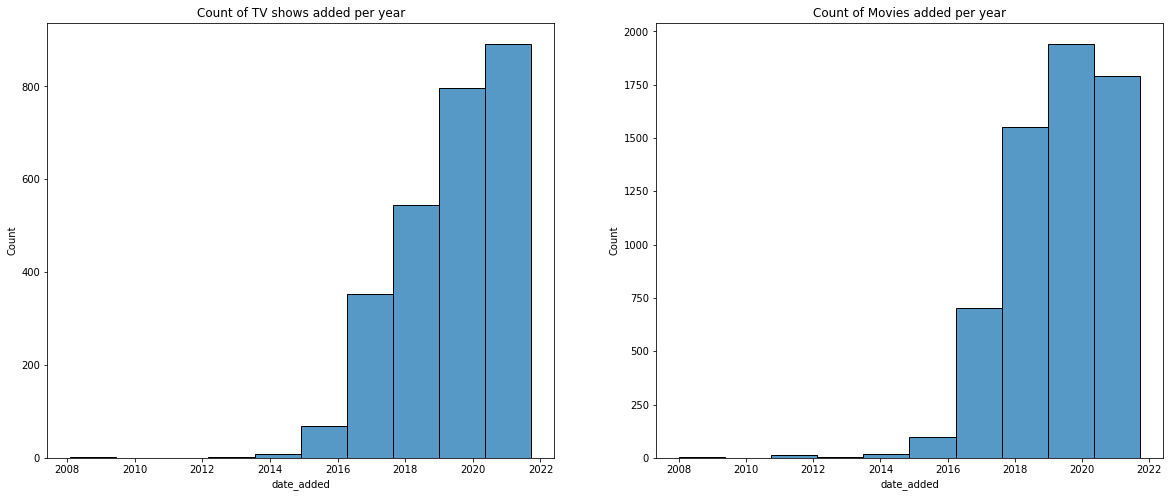

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=data.loc[data['type']=='TV Show'],x='date_added',bins=10)
plt.title('Count of TV shows added per year')
plt.subplot(1,2,2)
sns.histplot(data=data.loc[data['type']=='Movie'],x='date_added',bins=10)
plt.title('Count of Movies added per year')
plt.show()

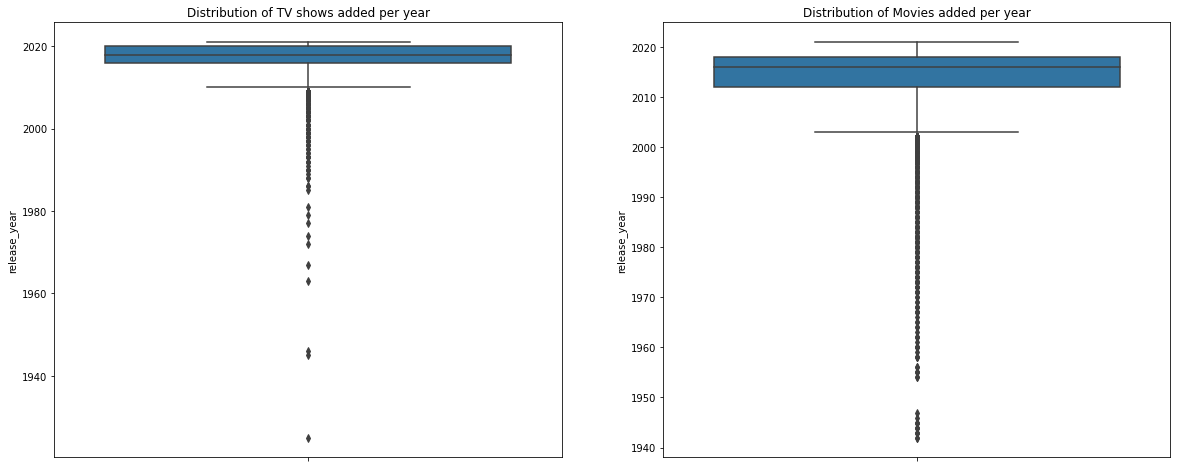

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=data.loc[data['type']=='TV Show'],y='release_year')
plt.title('Distribution of TV shows added per year')
plt.subplot(1,2,2)
sns.boxplot(data=data.loc[data['type']=='Movie'],y='release_year')
plt.title('Distribution of Movies added per year')
plt.show()

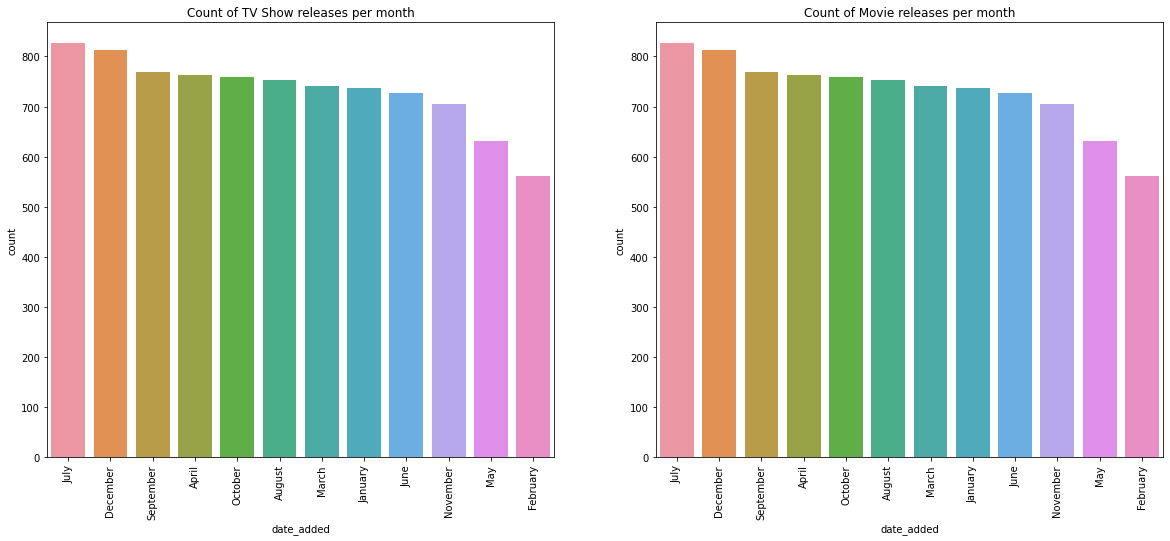

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=data.loc[data['type']=='TV Show'],x=data['date_added'].dt.month_name(),order= data['date_added'].dt.month_name().value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of TV Show releases per month')
plt.subplot(1,2,2)
sns.countplot(data=data.loc[data['type']=='Movie'],x=data['date_added'].dt.month_name(),order= data['date_added'].dt.month_name().value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Movie releases per month')
plt.show()

### 4.2 For categorical variable(s): Boxplot 

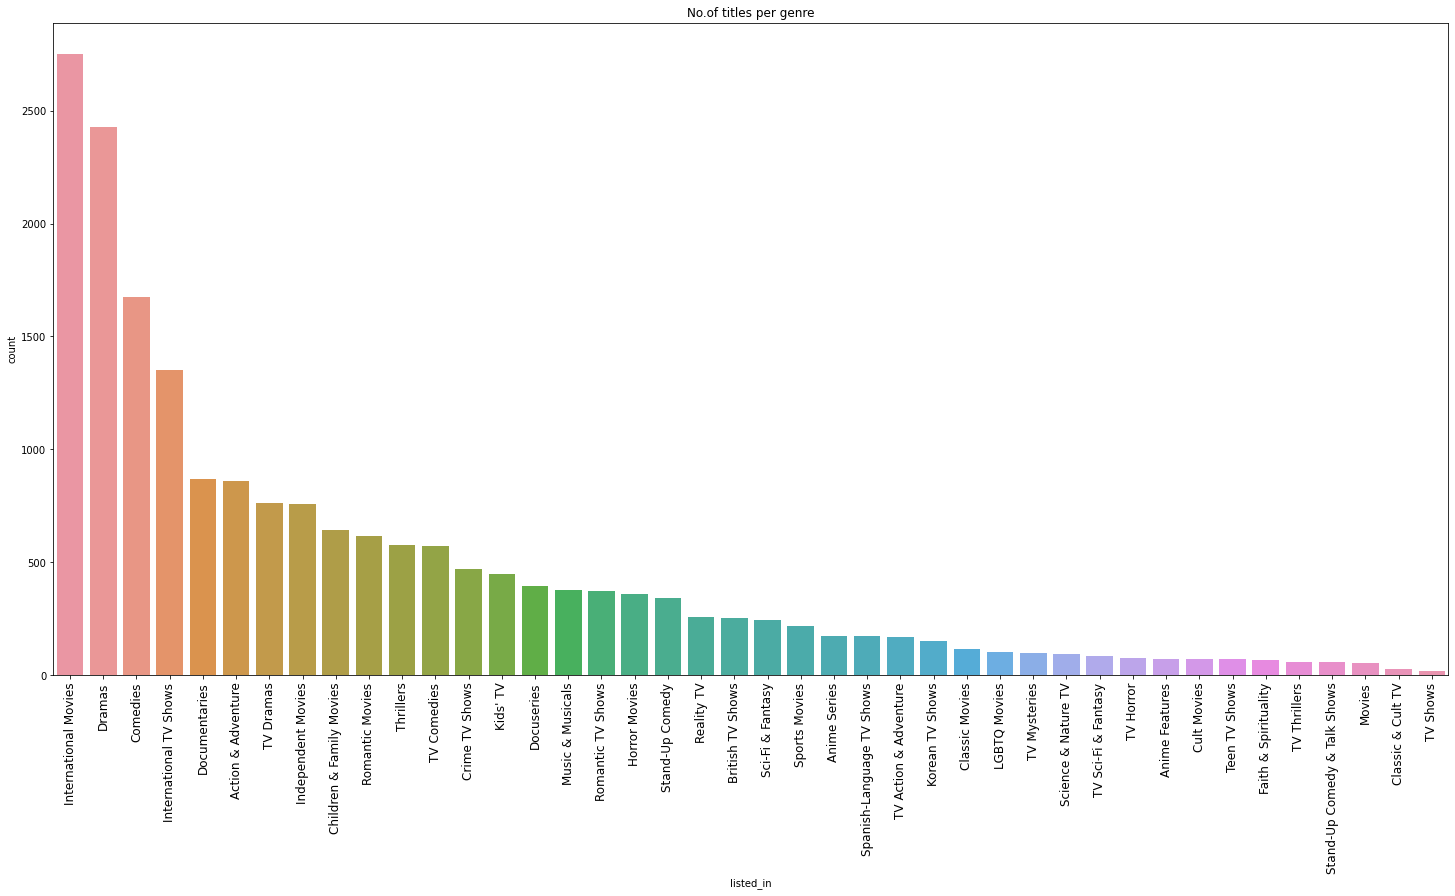

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(data=data_genre_tidy,x='listed_in',order=data_genre_tidy['listed_in'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)
plt.title('No.of titles per genre')
plt.show()

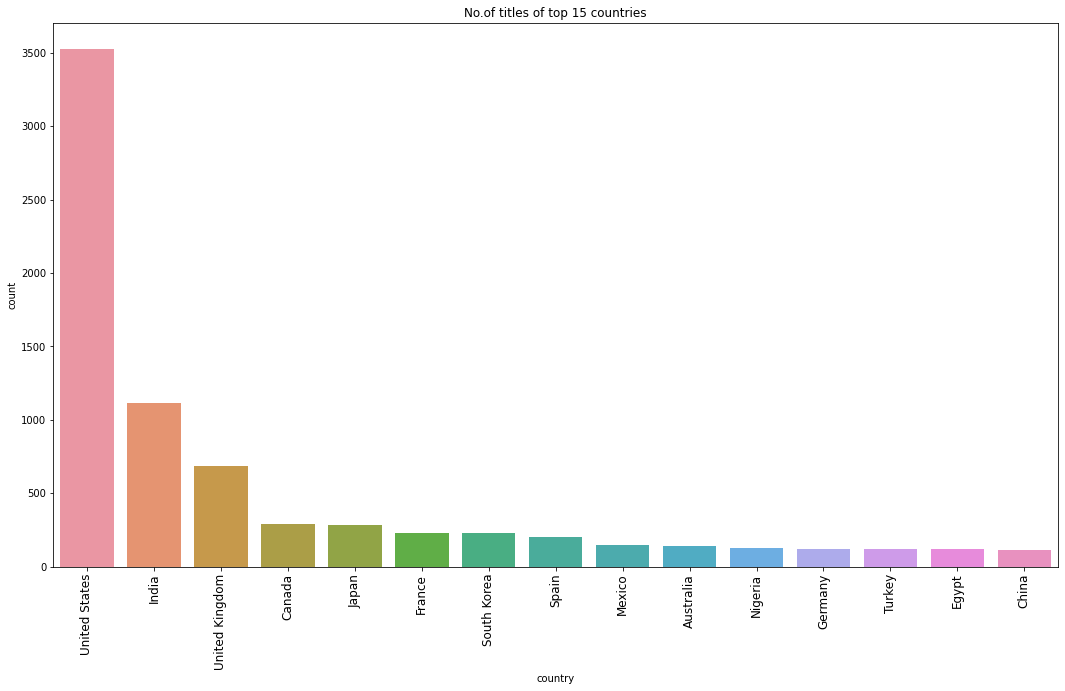

In [ ]:
plt.figure(figsize=(18,10))
top_15_country = data_country_tidy['country'].value_counts().index[:15]
sns.countplot(data=data_country_tidy.loc[data_country_tidy['country'].isin(top_15_country)],x='country',order=data_country_tidy['country'].value_counts().index[:15])
plt.xticks(rotation=90, fontsize=12)
plt.title('No.of titles of top 15 countries')
plt.show()

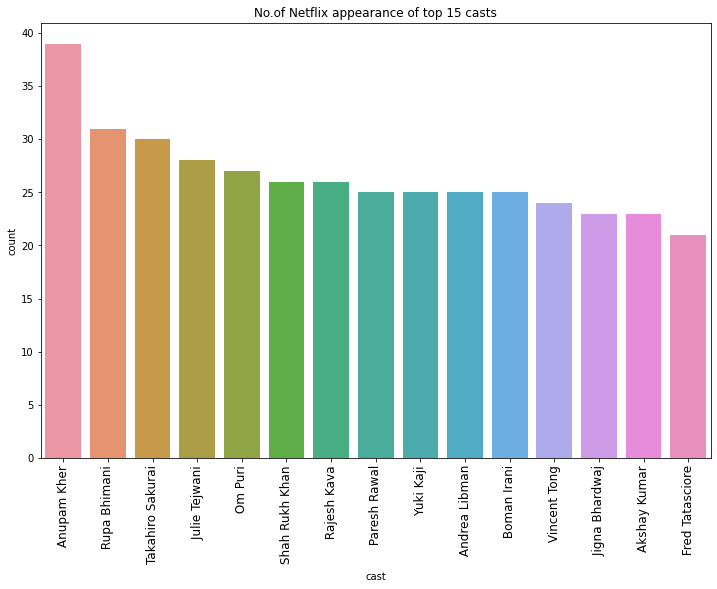

In [ ]:
plt.figure(figsize=(12,8))
top_15_cast = data_cast_tidy['cast'].value_counts().index[1:16]
sns.countplot(data=data_cast_tidy.loc[(data_cast_tidy['cast'].isin(top_15_cast)) & (data_cast_tidy['cast'] != 'Unknown')],x='cast',order=data_cast_tidy['cast'].value_counts().index[1:16])
plt.xticks(rotation=90, fontsize=12)
plt.title('No.of Netflix appearance of top 15 casts')
plt.show()

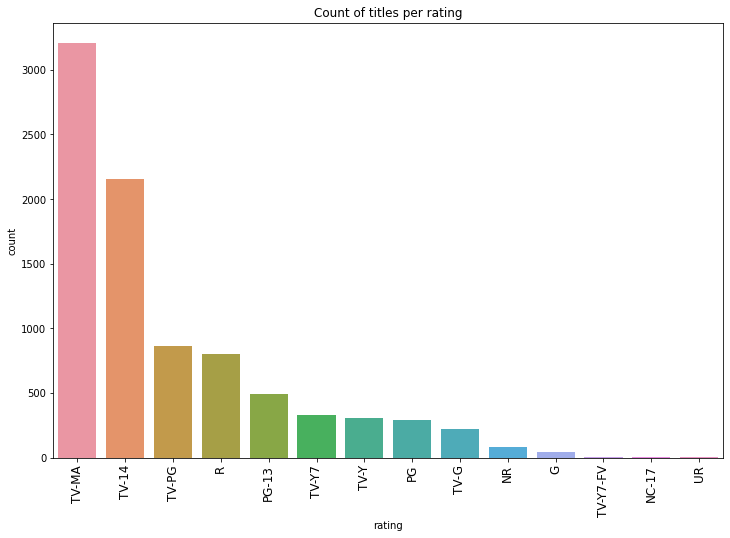

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='rating',order=data['rating'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)
plt.title('Count of titles per rating')
plt.show()

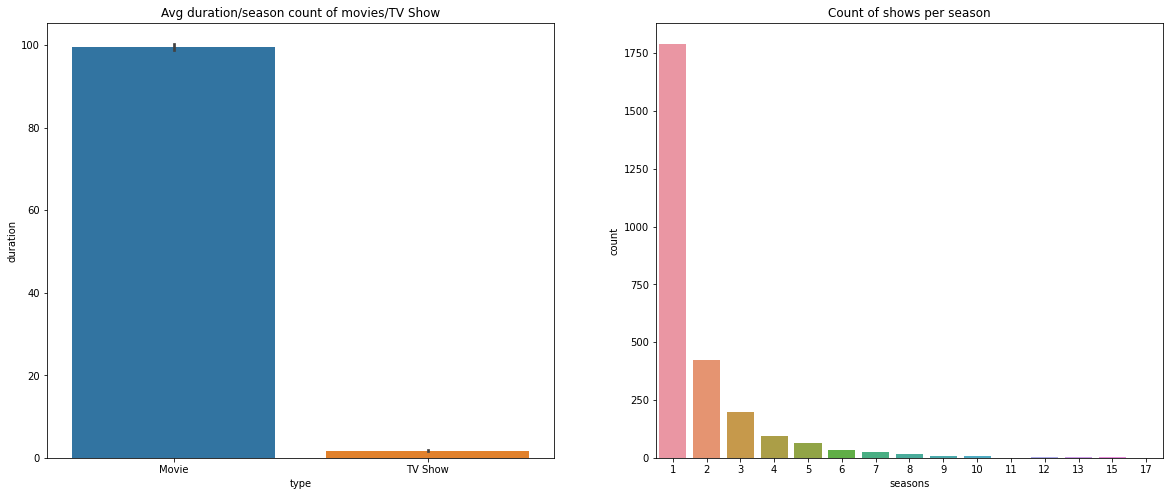

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data=data, x="type", y="duration", estimator=np.mean)
plt.title('Avg duration/season count of movies/TV Show')
plt.subplot(1,2,2)
sns.countplot(data=data.loc[data.type == 'TV Show'], x='duration')
plt.title('Count of shows per season')
plt.xlabel('seasons')
plt.show()

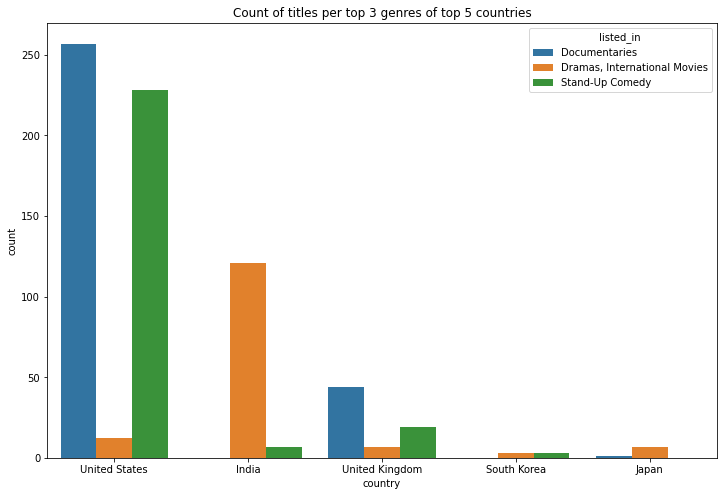

In [ ]:
plt.figure(figsize=(12,8))
top_5_country = data['country'].value_counts().index[:5]
top_3_genre = data['listed_in'].value_counts().index[:3]
sns.countplot(data=data.loc[(data['country'].isin(top_5_country)) & (data['listed_in'].isin(top_3_genre)) ] ,x='country',hue='listed_in')
plt.title('Count of titles per top 3 genres of top 5 countries')
plt.show()

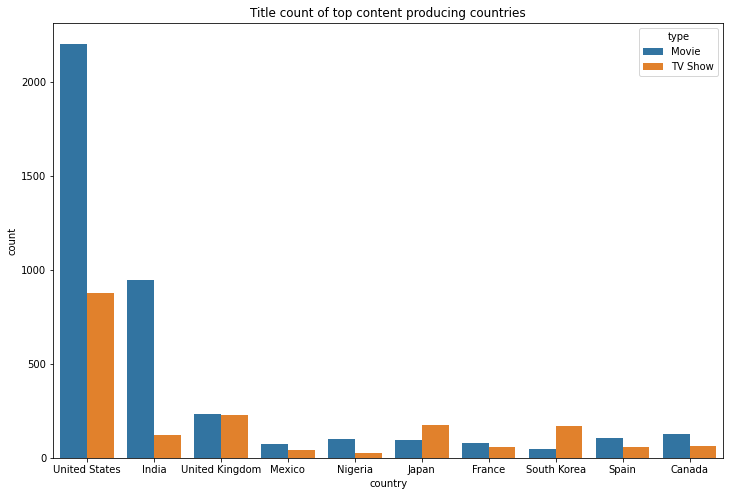

In [ ]:
plt.figure(figsize=(12,8))
top_10_country = data['country'].value_counts().index[:10]
sns.countplot(data=data.loc[data['country'].isin(top_10_country)] ,x='country',hue='type')
plt.title('Title count of top content producing countries')
plt.show()

### 4.3 For correlation: Heatmaps, Pairplots 

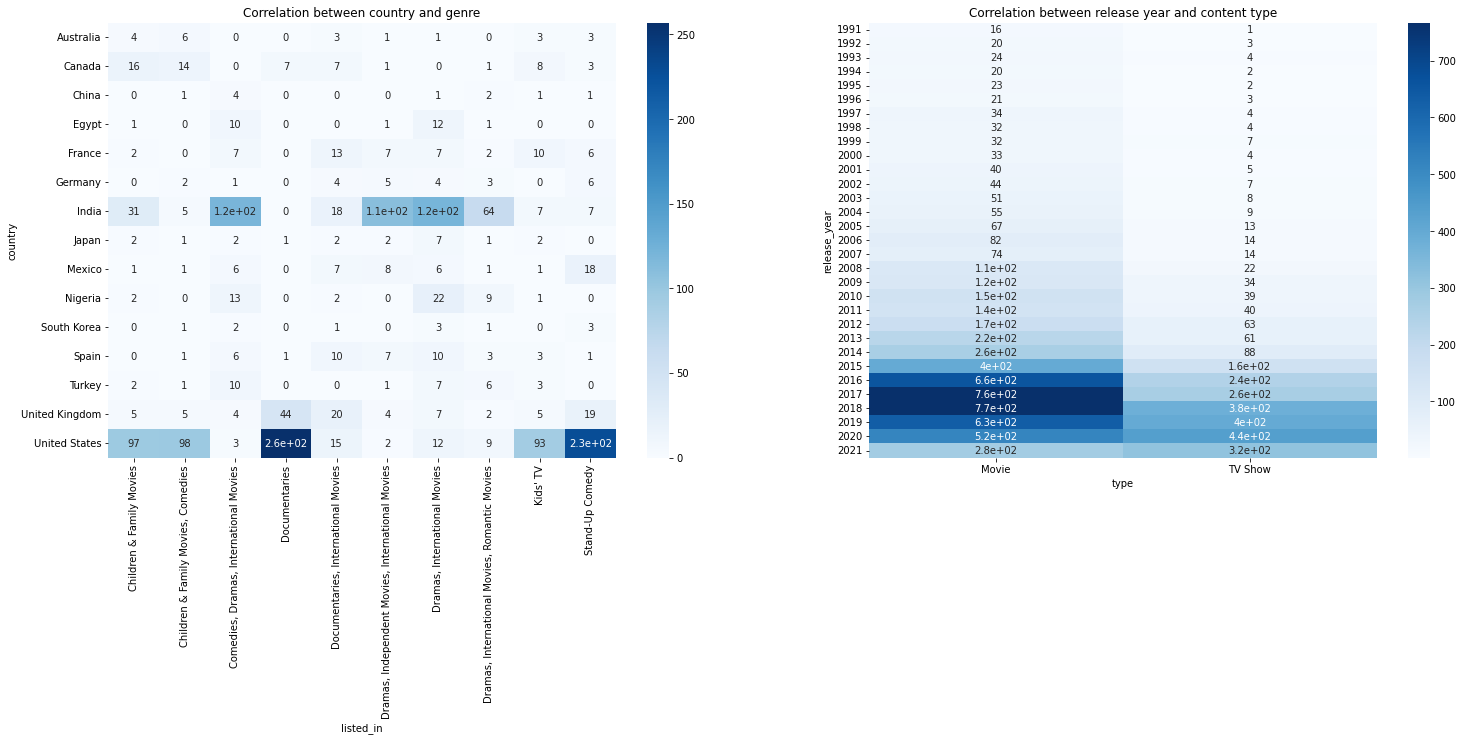

In [ ]:
top_10_genre = data['listed_in'].value_counts().index[:10]
a=pd.crosstab(data.loc[data['country'].isin(top_15_country),'country'],data.loc[data['listed_in'].isin(top_10_genre),'listed_in'])
b=pd.crosstab(data.loc[data.release_year > 1990,'release_year'],data.loc[:,'type'])
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.heatmap(a, cmap= "Blues", annot=True)
plt.title('Correlation between country and genre')
plt.subplot(1,2,2)
sns.heatmap(b, cmap= "Blues", annot=True)
plt.title('Correlation between release year and content type')
plt.show()

## 5. Missing Value & Outlier check (Treatment optional) 

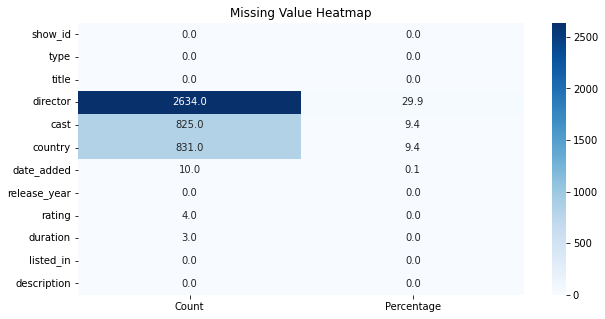

In [ ]:
#Missing Value
data_with_missing_values = pd.read_csv('netflix.csv')
count_missing_values = data_with_missing_values.isna().sum()
percentage_missing_values = (count_missing_values / len(data_with_missing_values.index)) * 100
missing_values_df = pd.concat([count_missing_values, percentage_missing_values], axis=1)
missing_values_df.columns = ['Count', 'Percentage']

plt.figure(figsize=(10,5))
sns.heatmap(missing_values_df, cmap='Blues', annot=True, fmt='.1f')
plt.title('Missing Value Heatmap')
plt.show()

<Axes: ylabel='release_year'>

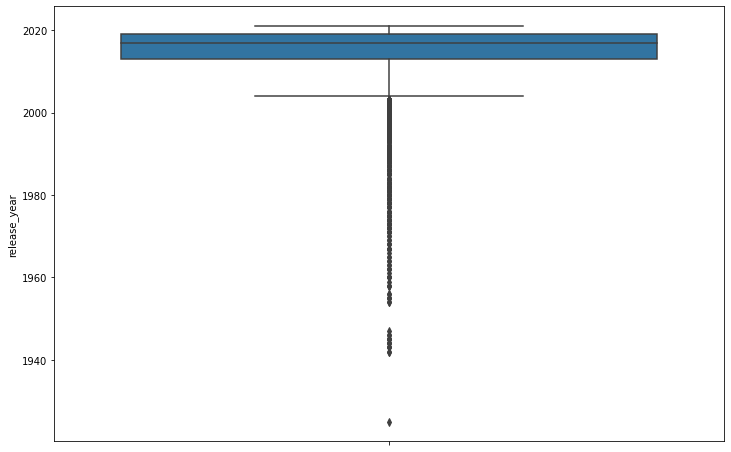

In [ ]:
#outlier check
plt.figure(figsize=(12,8))
sns.boxplot(data=data,y='release_year')

In [ ]:
#Further analysis for getting potential outliers using z-score test
z_scores = (data["release_year"] - data["release_year"].mean()) / data["release_year"].std()
potential_outliers = data[np.abs(z_scores) > 3]["release_year"]
potential_outliers.sort_values() #1925 - 1987 are potential outliers

4250    1925
8188    1942
7775    1942
8722    1943
8643    1943
        ... 
5944    1987
44      1987
4237    1987
1450    1987
6903    1987
Name: release_year, Length: 217, dtype: int64

## 6. Insights based on Non-Graphical and Visual Analysis

### 6.1 Comments on the range of attributes

1. The given dataset contains 8807 rows and 12 columns.
2. The columns are : 1.show_id, 2.type, 3.title, 4.director, 5.cast, 6.    country, 7.date_added, 8.release_year, 9.rating, 10.duration, 11.listed_in, 12.description.
3. 10 out of 12 columns are primarily of datatype object and 2 columns contain date information.





### 6.2 Comments on the distribution of the variables and relationship between them

1. Netflix dataset contains Movies/Tv Shows released between the period 1925 - 2021.
2. The above were added to the netflix platform between the period 2008-01-01 - 2021-09-25.       
3. The dataset provided contains missing values for the following columns:
director(2634), cast(825), country(831), date_added(10), rating(4), duration(3). The last 6 columns have negligible percentage, hence those rows were dropped.
Where as director(2634) column has almost 29.9% missing values. So the rows could not be dropped and the missing values were handled by filling 'Unkown'. Missing values of country and cast were 9.4% and the same were handles using the method - ffill.  


### 6.3 Comments for each univariate and bivariate plot

Univariate Plots:
1. Using histogram, number of Movies/Tv Shows added every year is calculated.
2. Using boxplot, distribution of Movies respective of year is plotted. This shows the statistical data of the above requirement.
3. Using countplot, distribution of TV Shows/Movies every month is calculated.
4. Using countplot, No.of titles per genre is plotted.
5. Using countplot, we have extracted the top 10 countries having most number of movies+tv show releases.
6. Using countplot, 15 casts having the most number of appearances in movies/tv shows are plotted.

Bivariate Plots:
1. Using barplot, average duration and season is plotted against the followifg catogories - movies/TV Show
2. Using countplot, number of TV shows every per season is visualized.
3. Usig countplot, number of titles per top 3 genres of top 5 countries are plotted.
4. Using countplot, Title count of Movies/tv shows belonging to top content producing countries are plotted.

## 7. Business Insights

1. Maximum number of movies(1900+) added to netflix was during the year 2020.
2. Maximum number of Tv Shows(800+) added to netflix was during the year 2021.
3. Highest number of Tv Shows were added to netflix during the months july and december.
4. And the least were during the months may and february.
5. Top 5 popular genres in netflix are : International movies, dramas, comedies, International tv shows and documentaries.
6. Top 3 genres that are least popular in netflix are : Faith & spirituality, TV Thrillers and classic & cult TV.
7. Top 5 countries having highest number of movie releases in netflix are : United States, India, United Kingdom, Canada and Japan.
8. Top 3 Actors/Cast who have appeared in Movies/Tv shows released in netflix are: Anupam Kher, Rupa Bhimani, Takahiro Sakurai.
9. Netflix contains highest Tv shows/Movies (3250+) of rating TV-MA and least common rating of movies/tv shows is UR.
10. TV Shows and movies with the release year less than 1987 are considered potential outliers, the data with those years might result in anomalies in data.


## 8. Recommendations

1. Highest number of movies are released in the months july and december. So we can safely add more number of movies during those months.
2. International movies, dramas, comedies, International tv shows and documentaries genres are the most popular, so releasing more content in this genres can satisfy netflix viewers..
3. Anupam Kher, Rupa Bhimani, Takahiro Sakurai are frequently appearing actors and adding movies/tv shows which are starred by them can increase viewership.
4. Most movies/tv shows falls under the rating TV-MA, TV-14 and TV-PG, so  more content with this rating can be added to the platform in turn decreasing the content under rating TY-F7-FV, NC-17 and UR, since these have the least viewership.    
5. Highest number of movies have its average duration as 95-100 mins.  Since this is runtime well recieved by the viewers, we can produce more of such similar content.
6. Only a minority of the tv shows have upto 10 seasons or more. These shows are recommended to be kept in the platform since it must have a large fanbase.
7. In India and Japan international movies are popular, so we can add more of those content in that region.
8. Similarly in United Kingdom and United States, documentaries and  standup comedies are the most viewed, hence increasing those content can be beneficial.
9. United States and India has higher movie viewership, whereas Japan and South Korea has more tv show viewership. The above points needs to be taken into acount before adding new content to these regions.
10. As Indian netflix users tend to watch more comedies,dramas,international movies,independent movies, it is recommended to release similar genres in the upcoming years for this region.
